## Black Scholes Pricing Model

[*********************100%***********************]  1 of 1 completed
C:\Users\dubey\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Call Option Price: 7.84
Put Option Price: 5.61

Call Option Greeks:
Delta: 0.5592
Gamma: 0.0236
Vega: 61.5571
Theta: -54.9978
Rho: 24.3700

Put Option Greeks:
Delta: -0.4408
Gamma: 0.0236
Vega: 61.5571
Theta: -52.4471
Rho: -20.1770


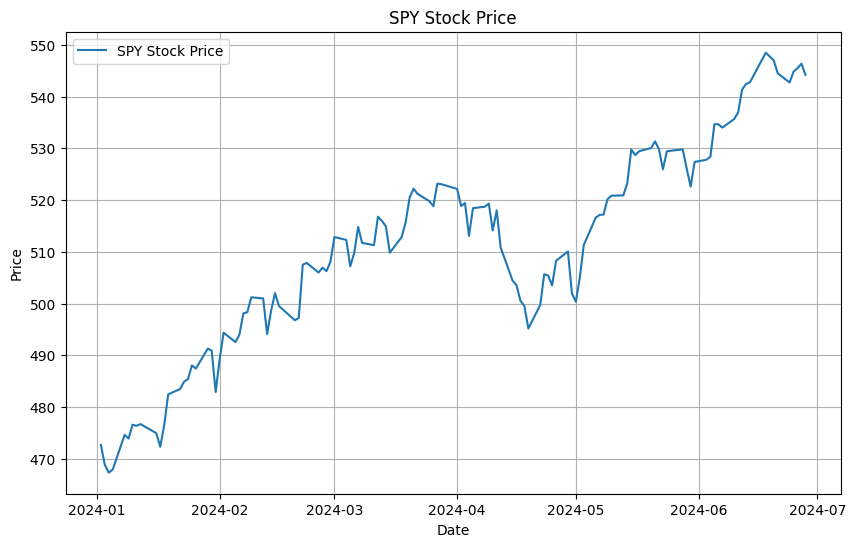

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

# Black-Scholes Pricing Model
def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return price

def option_greeks(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1) if option_type == "call" else -norm.cdf(-d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) 
             - r * K * np.exp(-r * T) * norm.cdf(d2 if option_type == "call" else -d2))
    rho = (K * T * np.exp(-r * T) * norm.cdf(d2) 
           if option_type == "call" else -K * T * np.exp(-r * T) * norm.cdf(-d2))

    return {"delta": delta, "gamma": gamma, "vega": vega, "theta": theta, "rho": rho}

def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_historical_volatility(data):
    log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
    volatility = np.std(log_returns) * np.sqrt(252)
    return volatility

if __name__ == "__main__":
    ticker = "SPY"
    start_date = "2024-01-01"
    end_date = "2024-07-01"
    r = 0.05  

    data = fetch_data(ticker, start_date, end_date)

    sigma = calculate_historical_volatility(data)

    S = data['Close'].iloc[-1]
    
    if isinstance(S, pd.Series):
        S = S.values[0]

    K = S 

    if isinstance(sigma, pd.Series):
        sigma = sigma.values[0]
    
    T = 30 / 365


    call_price = black_scholes(S, K, T, r, sigma, option_type="call")
    put_price = black_scholes(S, K, T, r, sigma, option_type="put")

    call_greeks = option_greeks(S, K, T, r, sigma, option_type="call")
    put_greeks = option_greeks(S, K, T, r, sigma, option_type="put")

    print(f"Call Option Price: {call_price:.2f}")
    print(f"Put Option Price: {put_price:.2f}")
    print("\nCall Option Greeks:")
    for key, value in call_greeks.items():
        print(f"{key.capitalize()}: {value:.4f}")

    print("\nPut Option Greeks:")
    for key, value in put_greeks.items():
        print(f"{key.capitalize()}: {value:.4f}")

    #Plot
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label=f"{ticker} Stock Price")
    plt.title(f"{ticker} Stock Price")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()
